## Рабочая тетрадь №4 Меджидов Магомедпаша Султанович БФБО-01-22

Курс № 1 Семестр № 2

# Задание 1
Реализовать классы нейросетей по аналогии с классом OurNeuralNetwork. Данные нейросети:
	три входа (x_1,x_2,x_3 );
	три нейрона в скрытых слоях (h_1,h_2,h_3);
	выход (o_1).
Нейроны имеют идентичные веса и пороги:
	w = [0.5,0.5,0.5] 
	b = 0 
Данные нейросети:
	два входа (x_1,x_2);
	два нейрона в скрытых слоях (h_1,h_2);
	два выхода (o_1,o_2 ).
Нейроны имеют идентичные веса и пороги:
	w = [1,0];
b = 1.

In [4]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class Neuron:

    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
    def feedforward(self ,inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return sigmoid(total)

class OurNeuralNetwork:
    def __init__(self):
        weights = np.array([0.5, 0.5, 0.5])
        bias = 0
        self.h1 = Neuron(weights, bias)
        self.h2 = Neuron(weights, bias)
        self.h3 = Neuron(weights, bias)
        self.o1 = Neuron(weights, bias)
    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        out_h3 = self.h3.feedforward(x)
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2, out_h3]))
        return out_o1
network = OurNeuralNetwork()
x = np.array([2, 3, 1])
print(network.feedforward(x))

0.8067238139969796


In [6]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class Neuron:

    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
    def feedforward(self ,inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return sigmoid(total)

class OurNeuralNetwork:
    def __init__(self):
        weights = np.array([1, 0])
        bias = 1
        self.h1 = Neuron(weights, bias)
        self.h2 = Neuron(weights, bias)
        self.o1 = Neuron(weights, bias)
        self.o2 = Neuron(weights, bias)
    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h1]))
        out_o2 = self.o2.feedforward(np.array([out_h2, out_h2]))
        return out_o1, out_o2
network = OurNeuralNetwork()
x = np.array([2, 3])
print(network.feedforward(x))

(0.8757270529783324, 0.8757270529783324)


# Задание 2
Реализуйте классы нейронных сетей с использованием других функций активации.

In [3]:
import numpy as np 

def sigmoid(x):
    return 1 / (1 + np.exp(-x))
class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
    def feedforward(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return sigmoid(total)

weights = np.array([1, 0])
bias = 0
n = Neuron(weights, bias)
x = np.array([2, 3])
print(n.feedforward(x))

0.8807970779778823


In [12]:
import numpy as np

def tanh(x):
    return (1 - np.exp(-x)) / (1 + np.exp(-x))

class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
    def feedforward(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return tanh(total)
    
weights = np.array([1, 0])
bias = 2
n = Neuron(weights, bias)
x = np.array([2,3])
print(n.feedforward(x))

0.9640275800758168


In [5]:
import numpy as np

def ReLU(x):
    return max(0,x)
class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
    def feedforward(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return ReLU(total)

weights = np.array([1, 0])
bias = 2
n = Neuron(weights, bias)
x = np.array([2, 3])
print(n.feedforward(x))

4


# Задание 3
Используйте классы MLPClassified и MLPRegressor для классификации и регрессии произвольных данных из интернета. Проведите анализ атрибуты, полученных моделей.

Для классификации можете взять набор данных Ирисов:
https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv
а для регрессии датасет зависимости заработной платы от опыта работы:
https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv 


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

data_url1 = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
raw = pd.read_csv(data_url1)
data1 = raw.iloc[:, :-1]
target1 = raw['variety']
print("Dataset Sizes : ", data1.shape, target1.shape)

#data_url2 = "https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv"
#raw_df = pd.read_csv(data_url2)
#data2 = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
#target2 = raw_df.values[1::2, :2]
#print("Dataset Sizes : ", data2.shape, target2.shape)

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(data1, target1, train_size=0.80, test_size=0.20, random_state=123)
print('Train/Test Sizes : ', X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

from sklearn.neural_network import MLPClassifier

mlp_classifier = MLPClassifier(random_state=123)
mlp_classifier.fit(X_train, Y_train)

Y_preds = mlp_classifier.predict(X_test)

print(Y_preds[:15])
print(Y_test[:15])

print('Test Accuracy : %.3f'%mlp_classifier.score(X_test, Y_test))
print('Training Accuracy : %.3f'%mlp_classifier.score(X_train, Y_train))


print('Loss : ', mlp_classifier.loss_)
print("Number of Coefs : ", len(mlp_classifier.coefs_))
print(len(mlp_classifier.intercepts_))
print(mlp_classifier.n_iter_)
print(mlp_classifier.out_activation_)

Dataset Sizes :  (150, 4) (150,)
Train/Test Sizes :  (120, 4) (30, 4) (120,) (30,)
['Versicolor' 'Virginica' 'Virginica' 'Versicolor' 'Setosa' 'Virginica'
 'Versicolor' 'Setosa' 'Setosa' 'Versicolor' 'Virginica' 'Setosa'
 'Versicolor' 'Virginica' 'Virginica']
72     Versicolor
112     Virginica
132     Virginica
88     Versicolor
37         Setosa
138     Virginica
87     Versicolor
42         Setosa
8          Setosa
90     Versicolor
141     Virginica
33         Setosa
59     Versicolor
116     Virginica
135     Virginica
Name: variety, dtype: object
Test Accuracy : 0.967
Training Accuracy : 0.975
Loss :  0.3012607394074939
Number of Coefs :  2
2
200
softmax


C:\Users\MI\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


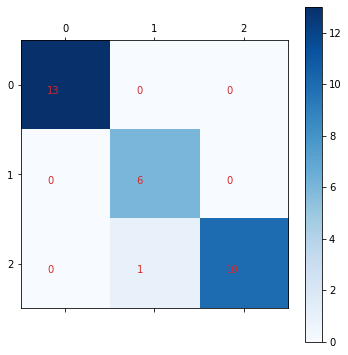

In [21]:
from sklearn.metrics import confusion_matrix

def plot_configuration_matrix(Y_test, Y_preds):
    conf_mat = confusion_matrix(Y_test, Y_preds)
    fig = plt.figure(figsize=(6, 6))
    plt.matshow(conf_mat, cmap=plt.cm.Blues, fignum=1)
    plt.yticks(range(3), range(3))
    plt.xticks(range(3), range(3))
    plt.colorbar()
    for i in range(3):
        for j in range(3):
            plt.text(i - 0.2, j + 0.1, str(conf_mat[j, i]), color='tab:red')
plot_configuration_matrix(Y_test, mlp_classifier.predict(X_test))

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

data_url2 = "https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv"
raw_df = pd.read_csv(data_url2)
data2 = raw_df.iloc[:, :-1]
target2 = raw_df['Salary']
print("Dataset Sizes : ", data2.shape, target2.shape)

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(data2, target2, train_size=0.80, test_size=0.20, random_state=43)
print('Train/Test Sizes : ', X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

from sklearn.neural_network import MLPClassifier

mlp_classifier = MLPClassifier(random_state=123)
mlp_classifier.fit(X_train, Y_train)

Y_preds = mlp_classifier.predict(X_test)

print(Y_preds[:15])
print(Y_test[:15])

print('Test Accuracy : %.3f'%mlp_classifier.score(X_test, Y_test))
print('Training Accuracy : %.3f'%mlp_classifier.score(X_train, Y_train))

from sklearn.metrics import confusion_matrix


print('Loss : ', mlp_classifier.loss_)
print("Number of Coefs : ", len(mlp_classifier.coefs_))
print(len(mlp_classifier.intercepts_))
print(mlp_classifier.n_iter_)
print(mlp_classifier.out_activation_)

Dataset Sizes :  (30, 1) (30,)
Train/Test Sizes :  (24, 1) (6, 1) (24,) (6,)
[122391.  55794.  55794.  56642.  56642.  56642.]
25    105582.0
12     56957.0
13     57081.0
6      60150.0
7      54445.0
8      64445.0
Name: Salary, dtype: float64
Test Accuracy : 0.000
Training Accuracy : 0.208
Loss :  2.4601504768923723
Number of Coefs :  2
2
200
softmax


C:\Users\MI\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
